In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy import sparse
from scipy import integrate
from IPython.display import HTML
#Note: everything is dimensionless, i.e h=1

In [2]:
#first we discretize a line
N = 50
dx = 1/N
x = np.arange(0,10,dx)
sigma = 0.1
A = 1.0 / (sigma * np.sqrt(np.pi))

In [3]:
#Now we need to build the hamiltonian, first the kinetic energy with the laplace
#operator (i.e in 1D it is just the second derivative)
L = sparse.diags([1, -2, 1], [-1, 0, 1],shape=(x.size, x.size))*(1/dx**2)
T = (-0.5)*L
#now we specify the potential
V = 20*(x-5)**2

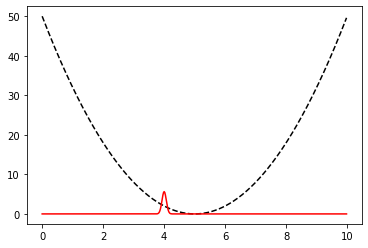

In [4]:
sigma = 0.1                        # width of initial gaussian wave-packet
x0    = 4                        # center of initial gaussian wave-packet
psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * x)

#plot our stuff
plt.plot(x, 0.1*V, "k--", label=r"V(x)")
plt.plot(x, np.abs(psi0)**2, "r", label=r"initial wave function")

In [5]:
#now we define the time evolution with the hamiltonian
def psi_t(t, psi):
    return -1j * (- 0.5 * L.dot(psi) + V * psi)

dt = 0.005  # time interval for snapshots
t0 = 0.0    # initial time
tf = 1.0    # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

# Now python integrates it for us, yay! (it uses runge-kutta method)
sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval, method="RK23")


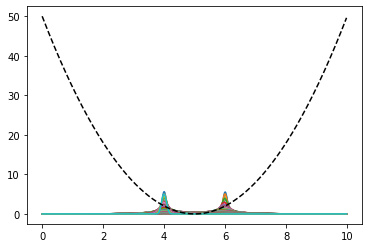

In [6]:
fig = plt.figure(figsize=(6, 4))
for i, t in enumerate(sol.t):
    plt.plot(x, np.abs(sol.y[:,i])**2) 
plt.plot(x, 0.1*V, "k--", label=r"V(x)")

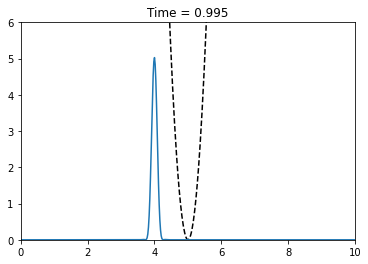

In [7]:
#now the part everyone cares about... the animation!
fig = plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 6)
title = ax1.set_title('')
line1, = ax1.plot([], [], "k--")
line2, = ax1.plot([], [])


def init():
    line1.set_data(x, V)
    return line1,


def animate(i):
    line2.set_data(x, np.abs(sol.y[:,i])**2)
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line1,


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(sol.t), interval=50, blit=True)
anim.save('sho.mp4', fps=15, extra_args=['-vcodec', 'libx264'], dpi=600)
HTML(anim.to_jshtml())